In [2]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Specify the path 
heat_wave_path = "PATH_TO_HEAT_WAVE_LIBRARY"
cold_snap_path = "PATH_TO_COLD_SNAP_LIBRARY"

In [4]:
# List all files in the directory
filenames_hw = [file for file in os.listdir(heat_wave_path) if 'average_def' in file and file.endswith('.csv')]
filenames_cs = [file for file in os.listdir(cold_snap_path) if 'average_def' in file and file.endswith('.csv')]

In [5]:
# Sort the filenames
filenames_hw = sorted(filenames_hw, key=lambda name: int(re.search(r'\d+', name).group()))
filenames_cs = sorted(filenames_cs, key=lambda name: int(re.search(r'\d+', name).group()))


In [6]:
# Reading each CSV file into a DataFrame and assigning a definition label
dfs_hw = []
for i, filename in enumerate(filenames_hw, start = 1):
    full_path = os.path.join(heat_wave_path, filename)
    df = pd.read_csv(full_path)
    df['definition'] = f'Definition {i}'
    dfs_hw.append(df)


dfs_cs = []
for i, filename in enumerate(filenames_cs, start = 1):
    full_path = os.path.join(cold_snap_path, filename)
    df = pd.read_csv(full_path)
    df['definition'] = f'Definition {i}'
    dfs_cs.append(df)
    

# Convert to a data frame
all_hw = pd.concat(dfs_hw, ignore_index = True)

all_cs = pd.concat(dfs_cs, ignore_index = True)


In [7]:
# Convert 'centroid_date' to datetime
all_hw['centroid_date'] = pd.to_datetime(all_hw['centroid_date'])

all_cs['centroid_date'] = pd.to_datetime(all_cs['centroid_date'])


In [8]:
# Convert K to degree C
all_hw['highest_temperature'] = all_hw['highest_temperature'] - 273.15

all_cs['lowest_temperature'] = all_cs['lowest_temperature'] - 273.15


# Plot for event intensity (highest/lowest temperature)

In [10]:
# Group by the definition and NERC subregions, then calculate the mean of extreme_temperature
grouped_hw = all_hw.groupby(['definition', all_hw['NERC_ID']])['highest_temperature'].mean().unstack(0)

grouped_cs = all_cs.groupby(['definition', all_cs['NERC_ID']])['lowest_temperature'].mean().unstack(0)


In [11]:
# Sort columns and rows
grouped_hw = grouped_hw.reindex(sorted(grouped_hw.columns, key=lambda x: int(re.search(r'\d+', x).group())), axis=1)
grouped_hw = grouped_hw.reindex(sorted(grouped_hw.index, key=lambda x: int(re.search(r'\d+', x).group())))

grouped_cs = grouped_cs.reindex(sorted(grouped_cs.columns, key=lambda x: int(re.search(r'\d+', x).group())), axis=1)
grouped_cs = grouped_cs.reindex(sorted(grouped_cs.index, key=lambda x: int(re.search(r'\d+', x).group())))


In [12]:
grouped_hw

definition,Definition 1,Definition 2,Definition 3,Definition 4,Definition 5,Definition 6,Definition 7,Definition 8,Definition 9,Definition 10,Definition 11,Definition 12
NERC_ID,,,,,,,,,,,,
NERC1,34.137572,35.120911,35.779636,36.471584,35.256729,36.201236,34.999379,27.583613,33.785497,35.887832,35.188110,27.330792
NERC2,33.069217,34.127218,35.348901,36.197934,34.169845,35.694318,33.837082,27.308215,32.954036,35.467927,33.658868,26.829688
NERC3,38.075216,39.024007,39.915658,40.600329,39.053547,40.295471,38.745092,33.292269,37.525160,39.175540,38.519064,32.050838
NERC4,33.669735,34.238723,34.709044,35.123657,34.323976,35.012533,34.062801,31.512781,32.812899,34.151058,33.568793,30.438560
NERC5,27.724522,28.687152,29.684948,30.332499,28.656130,29.978779,28.591781,21.896854,27.343160,29.512649,28.498837,20.719701
NERC6,29.694112,30.638087,31.516756,32.062623,30.592466,31.790628,30.619677,20.457968,29.671956,31.740652,30.538988,19.549435
NERC7,30.315824,31.086734,32.014706,32.425373,31.199088,32.386966,30.988966,21.902027,30.159189,31.914340,31.375346,21.299875
NERC8,37.269055,38.320013,39.419520,40.173871,38.409400,39.681620,38.016741,30.112207,36.876649,39.150254,37.667872,28.722617
NERC9,35.893377,36.931711,37.834905,38.586263,36.905194,38.365068,36.391495,30.776571,35.197892,37.121156,35.882940,30.065306


In [29]:
# Generate 12 colors using Turbo colormap
turbo_colors = [plt.cm.turbo(i / 11) for i in range(12)]
# Assign these Turbo colors to the thresholds
custom_colors = [
    turbo_colors[0],  # Def 1: Turbo color for >90th
    turbo_colors[1],  # Def 2: Turbo color for >95th
    turbo_colors[2],  # Def 3: Turbo color for >98th
    turbo_colors[3],  # Def 4: Turbo color for >99th
    turbo_colors[4],  # Def 5: Turbo color for >95th
    turbo_colors[5],  # Def 6: Turbo color for >97.5th + >81th
    turbo_colors[6],  # Def 7: Turbo color for >90th + >75th
    turbo_colors[7],  # Def 8: Turbo color for >90th
    turbo_colors[8],  # Def 9: Turbo color for >95th
    turbo_colors[9],  # Def 10: Turbo color for >97.5th + >81th
    turbo_colors[10], # Def 11: Turbo color for >90th + >75th
    turbo_colors[11], # Def 12: Turbo color for >90th
]

# Define the line styles based on the thresholds logic
linestyles = [
    '-',   # Def 1-4: Solid line for single threshold
    '-',
    '-',
    '-',
    '-',   # Def 5: Solid line for single threshold
    '--',  # Def 6: Dashed line for two thresholds
    '--',  # Def 7: Dashed line for two thresholds
    'dotted',  # Def 8: Dotted line for moving window
    '-',   # Def 9: Solid line for single threshold
    '--',  # Def 10: Dashed line for two thresholds
    '--',  # Def 11: Dashed line for two thresholds
    'dotted',  # Def 12: Dotted line for moving window
]

C:\Users\wanh535\AppData\Local\Temp\ipykernel_25344\3140822513.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels([extract_number(x) for x in grouped_hw.index])
C:\Users\wanh535\AppData\Local\Temp\ipykernel_25344\3140822513.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels([extract_number(x) for x in grouped_cs.index])


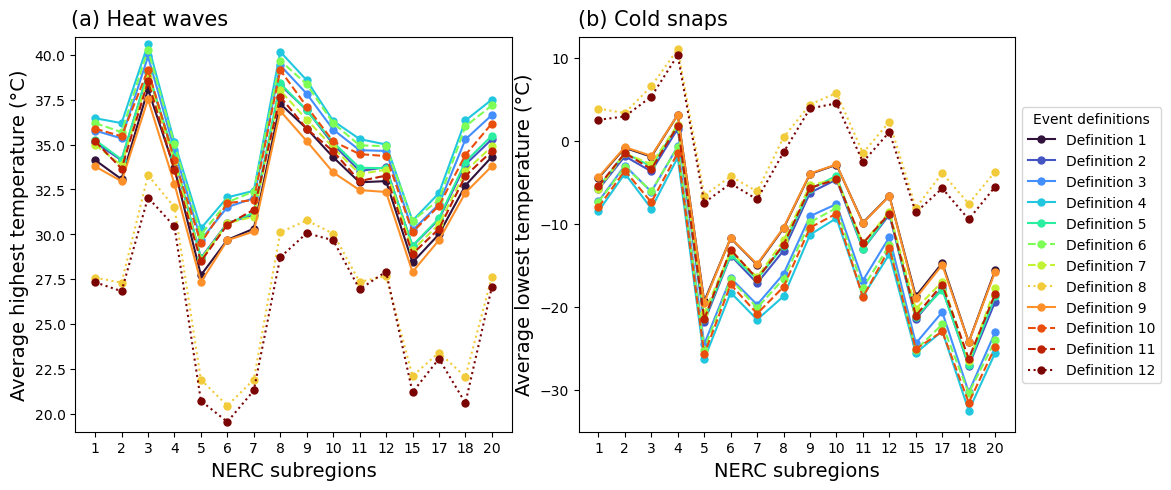

In [31]:
## Plot the extreme temperatures for each NERC subregion under different definitions

# Define the function to extract numbers
def extract_number(s):
    return re.findall(r'\d+', s)[0]

# Create the plots using the updated color, line styles, and smaller marker size
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Define the marker size you want (e.g., 5)
marker_size = 5

# Subplot 1: grouped_hw for heat waves
for idx, column in enumerate(grouped_hw.columns):
    axes[0].plot(grouped_hw.index, grouped_hw[column], marker='o', label=column, color=custom_colors[idx], linestyle=linestyles[idx], markersize=marker_size)
axes[0].set_ylabel('Average highest temperature (°C)', fontsize=14)
axes[0].set_ylim([19, 41])
axes[0].set_xlabel('NERC subregions', fontsize=14)
axes[0].set_xticklabels([extract_number(x) for x in grouped_hw.index])
axes[0].text(0.17, 1.07, '(a) Heat waves', size=15, ha='center', va='top', transform=axes[0].transAxes)  # Adjusted to be closer below

# Subplot 2: grouped_cs for cold snaps
for idx, column in enumerate(grouped_cs.columns):
    axes[1].plot(grouped_cs.index, grouped_cs[column], marker='o', label=column, color=custom_colors[idx], linestyle=linestyles[idx], markersize=marker_size)
axes[1].set_ylabel('Average lowest temperature (°C)', fontsize=14)
axes[1].set_ylim([-35, 12.5])
axes[1].set_xlabel('NERC subregions', fontsize=14)
axes[1].set_xticklabels([extract_number(x) for x in grouped_cs.index])
axes[1].text(0.17, 1.07, '(b) Cold snaps', size=15, ha='center', va='top', transform=axes[1].transAxes)  # Adjusted to be closer below


# Use the handles and labels from one subplot for the legend
handles, labels = axes[0].get_legend_handles_labels()

# Create one common legend for the figure with unique labels
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(0.85, 0.5), ncol=1, title='Event definitions')

# Adjust layout to prevent overlap and ensure everything fits
plt.tight_layout()
plt.subplots_adjust(right=0.85, hspace=0.25)  # Adjust the right parameter to make space for the legend

# plt.savefig("Figure_S1_all_years_turbo.tif", format="tif", dpi=300)
# Show the plot
plt.show()


# Plot the event frequency (count)

In [33]:
# # Group by the definition and the NERC subregions, then calculate the number of event
grouped_hw_count = all_hw.groupby(['NERC_ID', all_hw['definition']]).size().unstack(fill_value=0)

grouped_cs_count = all_cs.groupby(['NERC_ID', all_cs['definition']]).size().unstack(fill_value=0)


In [35]:
# Sort columns and rows
grouped_hw_count = grouped_hw_count.reindex(sorted(grouped_hw_count.columns, key=lambda x: int(re.search(r'\d+', x).group())), axis=1)
grouped_hw_count = grouped_hw_count.reindex(sorted(grouped_hw_count.index, key=lambda x: int(re.search(r'\d+', x).group())))

grouped_cs_count = grouped_cs_count.reindex(sorted(grouped_cs_count.columns, key=lambda x: int(re.search(r'\d+', x).group())), axis=1)
grouped_cs_count = grouped_cs_count.reindex(sorted(grouped_cs_count.index, key=lambda x: int(re.search(r'\d+', x).group())))


In [37]:
grouped_hw_count

definition,Definition 1,Definition 2,Definition 3,Definition 4,Definition 5,Definition 6,Definition 7,Definition 8,Definition 9,Definition 10,Definition 11,Definition 12
NERC_ID,,,,,,,,,,,,
NERC1,248,153,75,33,148,50,109,232,238,39,66,216
NERC2,318,185,79,45,189,57,176,261,335,57,183,242
NERC3,223,132,65,38,142,36,103,208,281,40,94,182
NERC4,241,153,80,39,176,48,153,216,291,31,106,185
NERC5,319,182,84,43,202,55,134,187,325,44,121,160
NERC6,243,163,82,45,180,50,81,230,241,45,89,223
NERC7,289,185,79,44,187,44,116,215,276,46,73,183
NERC8,269,162,78,36,165,38,112,211,273,40,117,176
NERC9,223,146,73,37,155,32,113,203,267,44,113,196


C:\Users\wanh535\AppData\Local\Temp\ipykernel_25344\3219304375.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels([extract_number(x) for x in grouped_hw_count.index])
C:\Users\wanh535\AppData\Local\Temp\ipykernel_25344\3219304375.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels([extract_number(x) for x in grouped_cs_count.index])


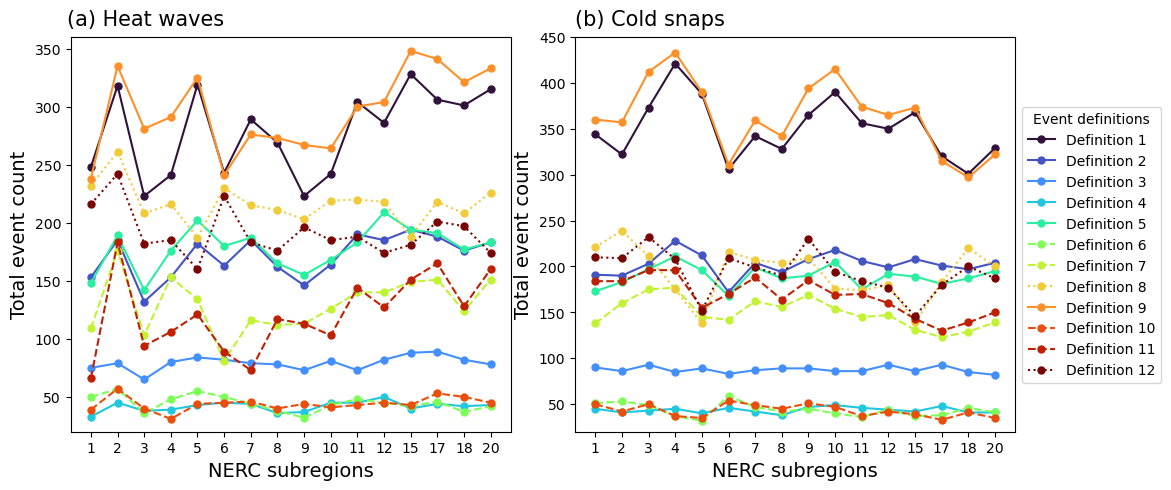

In [41]:
# Define the function to extract numbers
def extract_number(s):
    return re.findall(r'\d+', s)[0]

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Define the marker size you want (e.g., 5)
marker_size = 5

# Subplot 1: grouped_hw for heat waves
for idx, column in enumerate(grouped_hw_count.columns):
    axes[0].plot(grouped_hw_count.index, grouped_hw_count[column], marker='o', 
                    label=column, color=custom_colors[idx], linestyle=linestyles[idx], markersize=marker_size)
axes[0].set_ylabel('Total event count', fontsize = 14)
axes[0].set_ylim([20, 360])
axes[0].set_xlabel('NERC subregions', fontsize = 14)
axes[0].set_xticklabels([extract_number(x) for x in grouped_hw_count.index])
axes[0].text(0.17, 1.07, '(a) Heat waves', size=15, ha='center', va='top', transform=axes[0].transAxes)


# Subplot 2: grouped_cs for cold snaps
for idx, column in enumerate(grouped_cs_count.columns):
    axes[1].plot(grouped_cs_count.index, grouped_cs_count[column], marker='o', 
                    label=column, color=custom_colors[idx], linestyle=linestyles[idx], markersize=marker_size)
axes[1].set_ylabel('Total event count',  fontsize = 14)
axes[1].set_ylim([20, 450])
axes[1].set_xlabel('NERC subregions', fontsize = 14)
axes[1].set_xticklabels([extract_number(x) for x in grouped_cs_count.index])
axes[1].text(0.17, 1.07, '(b) Cold snaps', size=15, ha='center', va='top', transform=axes[1].transAxes)


# Use the handles and labels from one subplot for the legend
handles, labels = axes[0].get_legend_handles_labels()

# Create one common legend for the figure with unique labels
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(0.85, 0.5), ncol=1, title='Event definitions')

# Adjust layout to prevent overlap and ensure everything fits
plt.tight_layout()
plt.subplots_adjust(right=0.85, hspace=0.25)  # Adjust the right parameter to make space for the legend

# plt.savefig("Figure_S2_all_years_turbo.tif", format = "tif", dpi = 300)
# Show the plot
plt.show()

# Plot for duration (event days)

In [44]:
# Group by the definition and NERC subregions, then calculate the mean of event duration
grouped_hw_day = all_hw.groupby(['definition', all_hw['NERC_ID']])['duration'].mean().unstack(0)

grouped_cs_day = all_cs.groupby(['definition', all_cs['NERC_ID']])['duration'].mean().unstack(0)


In [46]:
# Sort columns and rows
grouped_hw_day = grouped_hw_day.reindex(sorted(grouped_hw_day.columns, key=lambda x: int(re.search(r'\d+', x).group())), axis=1)
grouped_hw_day = grouped_hw_day.reindex(sorted(grouped_hw_day.index, key=lambda x: int(re.search(r'\d+', x).group())))

grouped_cs_day = grouped_cs_day.reindex(sorted(grouped_cs_day.columns, key=lambda x: int(re.search(r'\d+', x).group())), axis=1)
grouped_cs_day = grouped_cs_day.reindex(sorted(grouped_cs_day.index, key=lambda x: int(re.search(r'\d+', x).group())))


C:\Users\wanh535\AppData\Local\Temp\ipykernel_25344\3091719916.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels([extract_number(x) for x in grouped_hw_day.index])
C:\Users\wanh535\AppData\Local\Temp\ipykernel_25344\3091719916.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels([extract_number(x) for x in grouped_cs_day.index])


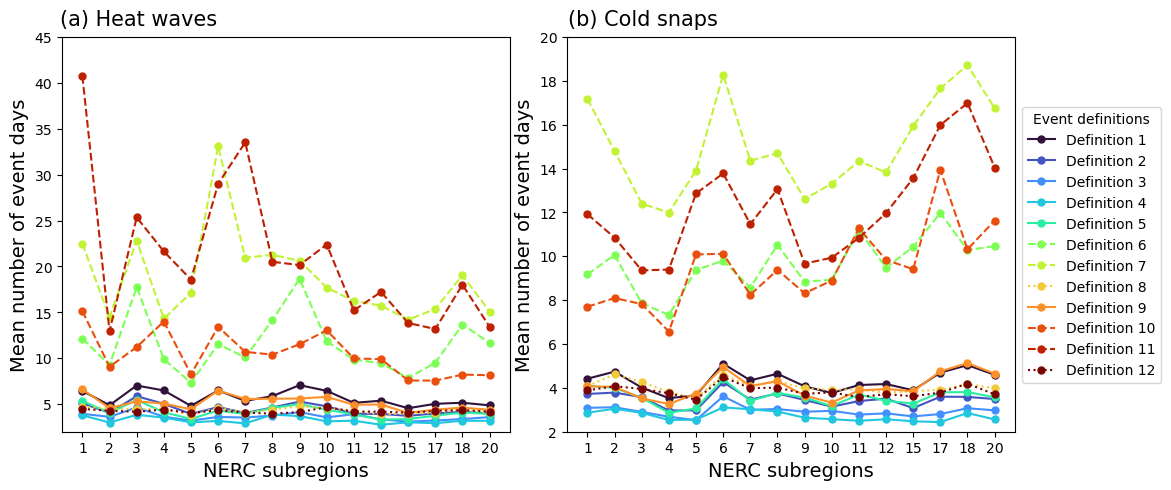

In [48]:
# Define the function to extract numbers
def extract_number(s):
    return re.findall(r'\d+', s)[0]

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Define the marker size you want (e.g., 5)
marker_size = 5

# Subplot 1: grouped_hw for heat waves
for idx, column in enumerate(grouped_hw_day.columns):
    axes[0].plot(grouped_hw_day.index, grouped_hw_day[column], marker='o', 
                    label=column, color=custom_colors[idx], linestyle=linestyles[idx], markersize=marker_size)
axes[0].set_ylabel('Mean number of event days', fontsize = 14)
axes[0].set_ylim([2, 45])
axes[0].set_xlabel('NERC subregions', fontsize = 14)
axes[0].set_xticklabels([extract_number(x) for x in grouped_hw_day.index])
axes[0].text(0.17, 1.07, '(a) Heat waves', size=15, ha='center', va='top', transform=axes[0].transAxes)

# Subplot 2: grouped_cs for cold snaps
for idx, column in enumerate(grouped_cs_day.columns):
    axes[1].plot(grouped_cs_day.index, grouped_cs_day[column], marker='o', 
                    label=column, color=custom_colors[idx], linestyle=linestyles[idx], markersize=marker_size)
axes[1].set_ylabel('Mean number of event days',  fontsize = 14)
axes[1].set_ylim([2, 20])
axes[1].set_xlabel('NERC subregions', fontsize = 14)
axes[1].set_xticklabels([extract_number(x) for x in grouped_cs_day.index])
axes[1].text(0.17, 1.07, '(b) Cold snaps', size=15, ha='center', va='top', transform=axes[1].transAxes)


# Use the handles and labels from one subplot for the legend
handles, labels = axes[0].get_legend_handles_labels()

# Create one common legend for the figure with unique labels
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(0.85, 0.5), ncol=1, title='Event definitions')

# Adjust layout to prevent overlap and ensure everything fits
plt.tight_layout()
plt.subplots_adjust(right=0.85, hspace = 0.25)  # Adjust the right parameter to make space for the legend

# plt.savefig("Figure_S3_all_years_turbo.tif", format = "tif", dpi = 300)
# Show the plot
plt.show()

# Plot for spatial coverage percentage

In [50]:
# Group by the definition and NERC subregions, then calculate the mean of spatial coverage
grouped_hw_spa = all_hw.groupby(['definition', all_hw['NERC_ID']])['spatial_coverage'].mean().unstack(0)

grouped_cs_spa = all_cs.groupby(['definition', all_cs['NERC_ID']])['spatial_coverage'].mean().unstack(0)


In [52]:
# Sort columns and rows
grouped_hw_spa = grouped_hw_spa.reindex(sorted(grouped_hw_spa.columns, key=lambda x: int(re.search(r'\d+', x).group())), axis=1)
grouped_hw_spa = grouped_hw_spa.reindex(sorted(grouped_hw_spa.index, key=lambda x: int(re.search(r'\d+', x).group())))

grouped_cs_spa = grouped_cs_spa.reindex(sorted(grouped_cs_spa.columns, key=lambda x: int(re.search(r'\d+', x).group())), axis=1)
grouped_cs_spa = grouped_cs_spa.reindex(sorted(grouped_cs_spa.index, key=lambda x: int(re.search(r'\d+', x).group())))


C:\Users\wanh535\AppData\Local\Temp\ipykernel_25344\2508422270.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels([extract_number(x) for x in grouped_hw_spa.index])
C:\Users\wanh535\AppData\Local\Temp\ipykernel_25344\2508422270.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels([extract_number(x) for x in grouped_cs_spa.index])


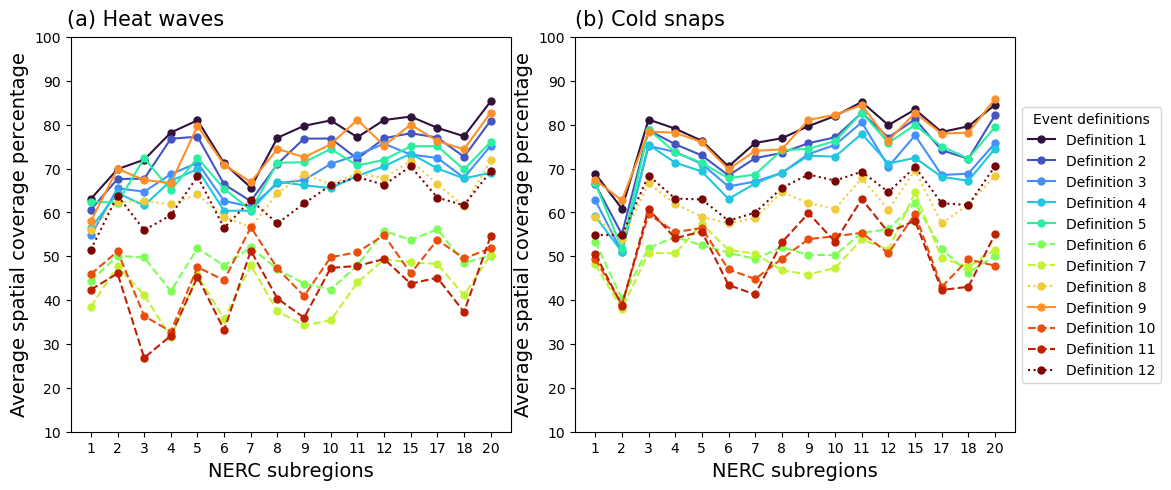

In [54]:
# Define the function to extract numbers
def extract_number(s):
    return re.findall(r'\d+', s)[0]

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Define the marker size you want (e.g., 5)
marker_size = 5

# Subplot 1: grouped_hw for heat waves
for idx, column in enumerate(grouped_hw_spa.columns):
    axes[0].plot(grouped_hw_spa.index, grouped_hw_spa[column], marker='o', label=column, 
                    color=custom_colors[idx], linestyle=linestyles[idx], markersize=marker_size)
axes[0].set_ylabel('Average spatial coverage percentage', fontsize = 14)
axes[0].set_ylim([10, 100])
axes[0].set_xlabel('NERC subregions', fontsize = 14)
axes[0].set_xticklabels([extract_number(x) for x in grouped_hw_spa.index])
axes[0].text(0.17, 1.07, '(a) Heat waves', size=15, ha='center', va='top', transform=axes[0].transAxes)

# Subplot 2: grouped_cs for cold snaps
for idx, column in enumerate(grouped_cs_spa.columns):
    axes[1].plot(grouped_cs_spa.index, grouped_cs_spa[column], marker='o', label=column, 
                    color=custom_colors[idx], linestyle=linestyles[idx], markersize=marker_size)
axes[1].set_ylabel('Average spatial coverage percentage',  fontsize = 14)
axes[1].set_ylim([10, 100])
axes[1].set_xlabel('NERC subregions', fontsize = 14)
axes[1].set_xticklabels([extract_number(x) for x in grouped_cs_spa.index])
axes[1].text(0.17, 1.07, '(b) Cold snaps', size=15, ha='center', va='top', transform=axes[1].transAxes)



# Use the handles and labels from one subplot for the legend
handles, labels = axes[0].get_legend_handles_labels()

# Create one common legend for the figure with unique labels
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(0.85, 0.5), ncol=1, title='Event definitions')

# Adjust layout to prevent overlap and ensure everything fits
plt.tight_layout()
plt.subplots_adjust(right=0.85, hspace=0.25)  # Adjust the right parameter to make space for the legend

# plt.savefig("Figure_S4_all_years_turbo.tif", format = "tif", dpi = 300)
# Show the plot
plt.show()